<h1>RNG and Sampling 1D Distributions</h1>
<p>Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu">amk23j@fsu.edu</a>
<p>27th September 2023</p>
<hr style="border:2px solid gray"/><br/><br/>

In [37]:
# Importing the required packages.
import numpy as np
import typing 
import scipy
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Latex

<hr style="border:1px solid gray"/><br/><br/>

### 1. LCG Random Number Generator

The RNG we will be using to sample uniform random numbers is,

$$ n_{i+1} = (an_i) \mod m $$

Where $a$ is typically an odd integer and $m = 2^k$, where $ k \approx 32\ or\ 64$

In [38]:
# Defining the RNG function.
def RNG(n:int,a:int,m:int,seed:float = 0.):
    n_i = np.full((n),0.)
    n_i[0] = seed
    for i in range(1,len(n_i)):
        n_i[i] = (a*n_i[i-1]) % m
    return n_i

<hr style="border:1px solid gray"/><p style="page-break-after:always;"></p><br/><br/>

#### A. Even values of $a$
In this demonstration,
We are using $ m = 2^k$, where $k = 3$.

Generating 10 random numbers using $a = 2, 4$

In [39]:
k = 3 
m = 2**k
a = 2
number_of_values = 10

random_values = RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

In [40]:
a = 4
random_values =  RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

It can be observed from the above that whenever the values of $a$ are even, the numbers generated increase upto a certain point and then become zero. 

<hr style="border:1px solid gray"/><br/><br/>

#### B. Odd values of $a$

Keeping the other parameters constant, we will use odd values of $a$.

Generating 10 random numbers using $a = 3, 5$.

In [41]:
a = 3
random_values = RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

In [42]:
a = 5
random_values = RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>


<p style="page-break-after:always;"></p>

<hr style="border:1px solid gray"/>

To find the period of the generated values, we will use the following function, which has been created by Chat-GPT. 

In [43]:
def find_period(arr):
    n = len(arr)
    for period in range(1, n // 2 + 1):
        is_periodic = True
        for i in range(period, n):
            if arr[i] != arr[i - period]:
                is_periodic = False
                break
        if is_periodic:
            return period
    return n

<small>The conversation can be found at https://chat.openai.com/share/fdf88bd9-8891-45c7-8dae-db72a4a9c58b</small>

<hr style="border:1px solid gray"/><br/><br/>

#### C. Period when $a = 3$ and $ m = 2^4$, and $ m = 2^5 $


In [44]:
a = 3
k = 4
m = 2**k

period = find_period(RNG(100,a,m,1.0))

display(Latex(f"Period of a LCG RNG with $a = {a}$ and $m = 2^{k}$ is ${period}$"))

<IPython.core.display.Latex object>

In [45]:
k = 5
m = 2**k
period = find_period(RNG(100,a,m,1.0))

display(Latex(f"Period of a LCG RNG with $a = {a}$ and $m = 2^{k}$ is ${period}$"))

<IPython.core.display.Latex object>

<hr style="border:1px solid gray"/><p style="page-break-after:always;"></p><br/><br/>

#### D. Numerical Experiments for the given claim.

Claim : The period of the LCG RNG with $ m = 2^k $ and odd $a$ is $2 ^ { k - 2 }$.

Let us calculate periods for the odd value of $a$ and $ k = \{2,3,4,5,6\}$ 

We will be starting with $ k = 2 $ since having $ k < 2$ will result in period which is $2 ^ {-k}$

In [46]:
a = 3
for k in range(2,7):
    m = 2**k
    period = (find_period(RNG(100,a,m,1.0)))
    display(Latex(f"For $ m = 2^{{{k}}} $ the period is {period} which is {('equal' if (period == 2**(k-2)) else 'not equal')} to $2 ^ {{  {k - 2} }}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Looking at the results above, we can see that the given claim is valid when $ k  \geq 2$
<hr style="border:1px solid gray"/><br/><br/>

#### E. Period of RANDU RNG

Using the claim we can calculate the period for RANDU RNG.

Which will be,

$ Period = 2 ^ {31-2}$, where $ k = 31$

<strong>The period of RANDU RNG is $536870912$ which is less than 1 billion.</strong>


<p style="page-break-after:always;"></p><br/>
<br/>
<br/>
<br/>
<br/>
<hr style="border:2px solid gray"/>
<br/><br/><br/><br/><br/>

### Sampling 1D distribution.

The distribution we are using is,
$$ f(x) = 6x(1-x),\ where \ 0 \leq x \leq 1 $$

### A. Accept-reject method

In [47]:
# Defining the f(x) function.
def f(x):
    return 6*x*(1-x)

We know that the area under the given curve is 1, and the domain we will be using for the accept-reject method will have an area of 1.5.

To get approx $10^5$ samples from the given distribution, we would have to throw $ 1.5 * 10^5 $ darts.

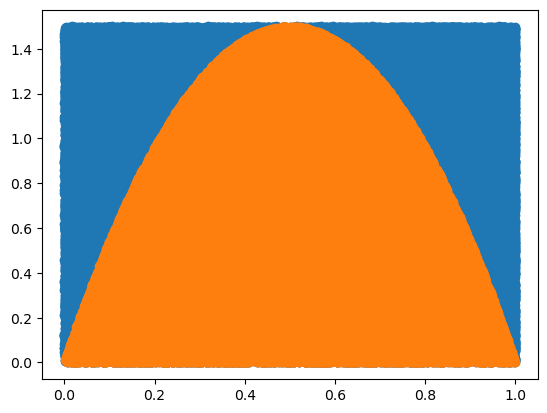

In [48]:
# Accept reject method.
fmax = 1.5
num = int(10**5 * 1.5)
x = np.random.uniform(0.0,1.0,num) #np.array([f(x) for x in np.random.uniform(0.0,1.0,1000)])
y = np.random.uniform(0.0,1.5,num)

condition = (y <= f(x))

#Applying the distribution condition.
samples = x[condition]

# Visualizing the darts.
plt.scatter(x,y)
plt.scatter(x[condition],y[condition])

(array([0.13605617, 0.34202659, 0.53793741, 0.7220282 , 0.89605937,
        1.04469005, 1.14930995, 1.26927074, 1.34773567, 1.43902659,
        1.46719348, 1.50114465, 1.51371916, 1.4719718 , 1.4463198 ,
        1.42242824, 1.34597524, 1.24009789, 1.13069967, 1.02507382,
        0.90335259, 0.73032737, 0.5381889 , 0.34906832, 0.11392503]),
 array([0.00243544, 0.04230208, 0.08216872, 0.12203537, 0.16190201,
        0.20176865, 0.2416353 , 0.28150194, 0.32136858, 0.36123523,
        0.40110187, 0.44096851, 0.48083516, 0.5207018 , 0.56056845,
        0.60043509, 0.64030173, 0.68016838, 0.72003502, 0.75990166,
        0.79976831, 0.83963495, 0.87950159, 0.91936824, 0.95923488,
        0.99910152]),
 <BarContainer object of 25 artists>)

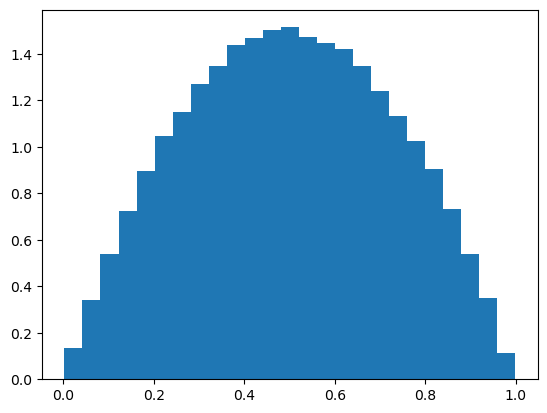

In [49]:
#Plotting the histogram.
plt.hist(samples, 25, density=True)

<hr style="border:1px solid gray"/><p style="page-break-after:always;"></p><br/><br/><br/>

### B.  Transformation method

We will be using the inverse linear interpolation.

$$ f(x) = 6x(1-x);  0 \leq x \leq 1 $$

The CFD will be,
$$ F(x) = \int_{0}^{1} 6x(1-x) dx = \int_{0}^{1} 6x - 6x^2 dx$$

<!-- $$ F(x) = \int_{0}^{1} 6x - 6x^2 dx$$ -->

$$ F(x) = \int_{0}^{1} 6x dx - \int_{0}^{1} 6x^2 dx = 6 {x^2 \over 2} - 6 {x^3 \over 3} dx$$

<!-- $$ F(x) = 6\int_{0}^{1} x dx - 6\int_{0}^{1} x^2 dx$$ -->

<!-- $$ F(x) = 6 {x^2 \over 2} - 6 {x^3 \over 3} dx$$ -->

$$ F(x) = 3x^2 - 2x^3 $$

In [50]:
def F(x):
    return  3*(x**2) - 2*(x**3)

In [51]:
number_of_points = 10**5
x = np.linspace(0,1,number_of_points)

Fi = F(x)

In [52]:
Finv = scipy.interpolate.interp1d(Fi, x, 'cubic')

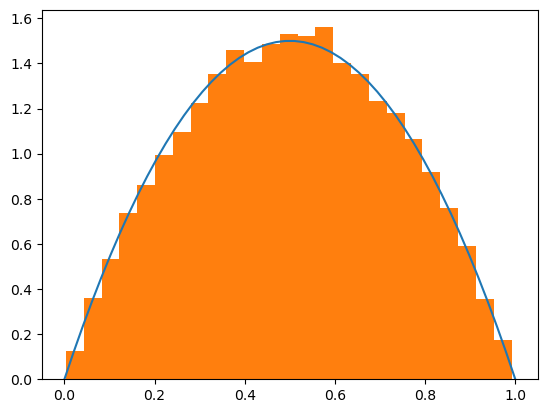

In [53]:

u = np.random.uniform(0,1, 10000)
x = Finv(u)

xi = np.linspace(0,1); fi = f(xi)

plt.plot(xi, fi)
_ = plt.hist(x, 25, density=True)

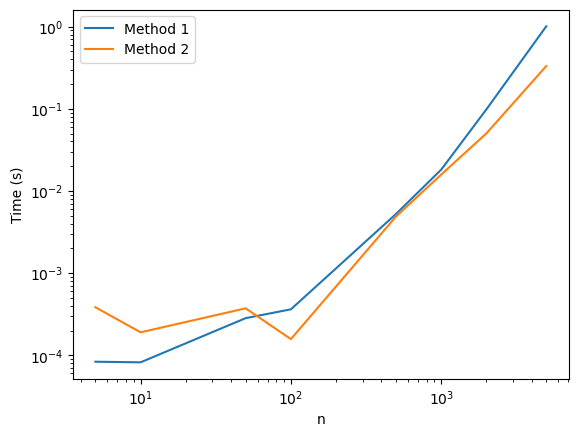

In [13]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def create_adjacency_matrix(n):
    A = np.random.randint(0, 2, (n, n))
    np.fill_diagonal(A, 0)
    while np.any(np.sum(A, axis=0) == 0):
        A = np.random.randint(0, 2, (n, n))
        np.fill_diagonal(A, 0)
    return A

def method_1(A, d=0.85):
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    R = np.linalg.solve(np.eye(n) - d * M, (1 - d) / n * np.ones(n))
    return R

def power_method(A, d=0.85, tol=1e-6, max_iter=100):
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    M_hat = d * M + (1 - d) / n * np.ones((n, n))
    R = np.ones(n) / n
    for _ in range(max_iter):
        R_next = M_hat @ R
        if np.linalg.norm(R_next - R) < tol:
            break
        R = R_next
    return R

def measure_time(n_values):
    method_1_times = []
    method_2_times = []

    for n in n_values:
        A = create_adjacency_matrix(n)

        method_1_timer = timeit.Timer(lambda: method_1(A))
        method_1_times.append(method_1_timer.timeit(number=1))

        method_2_timer = timeit.Timer(lambda: power_method(A))
        method_2_times.append(method_2_timer.timeit(number=1))

    return method_1_times, method_2_times

n_values = [5, 10, 50, 100, 500, 1000, 2000, 5000]
method_1_times, method_2_times = measure_time(n_values)

plt.loglog(n_values, method_1_times, label="Method 1")
plt.loglog(n_values, method_2_times, label="Method 2")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.legend()
plt.show()
